In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
from google.colab import files
uploaded = files.upload()


Saving time-series-19-covid-combined.csv.zip to time-series-19-covid-combined.csv.zip


In [19]:
df = pd.read_csv('time-series-19-covid-combined.csv.zip')


In [20]:
df.head()


,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,NaN,33.93911,67.709953,0,0.0,0


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72090 entries, 0 to 72089
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            72090 non-null  object 
 1   Country/Region  72090 non-null  object 
 2   Province/State  21870 non-null  object 
 3   Lat             72090 non-null  float64
 4   Long            72090 non-null  float64
 5   Confirmed       72090 non-null  int64  
 6   Recovered       68310 non-null  float64
 7   Deaths          72090 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 4.4+ MB


In [22]:
df.describe()


,Lat,Long,Confirmed,Recovered,Deaths
count,72090.000000,72090.000000,7.209000e+04,6.831000e+04,72090.000000
mean,20.961559,23.343773,4.284619e+04,2.760750e+04,1610.020807
std,24.882193,70.429778,3.257632e+05,2.119790e+05,10272.269230
min,-51.796300,-135.000000,0.000000e+00,0.000000e+00,0.000000
25%,6.428055,-15.310100,1.600000e+01,3.000000e+00,0.000000
50%,22.300000,20.939400,4.400000e+02,2.020000e+02,6.000000
75%,41.153300,80.771797,4.688750e+03,2.150000e+03,89.000000
max,71.706900,178.065000,8.106384e+06,6.524595e+06,219286.000000


In [23]:
df.isnull().sum()


,0
Date,0
Country/Region,0
Province/State,50220
Lat,0
Long,0
Confirmed,0
Recovered,3780
Deaths,0


In [24]:
df.duplicated().sum()


np.int64(0)

In [25]:
df.drop_duplicates(inplace=True)


In [27]:
df['Country/Region'].nunique()

189

In [29]:
df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)


,Confirmed
Country/Region,
US,738110558
Brazil,420424139
India,400134578
Russia,131125737
Peru,73605564
Spain,72565302
Mexico,66665740
South Africa,62324572
Colombia,59585580


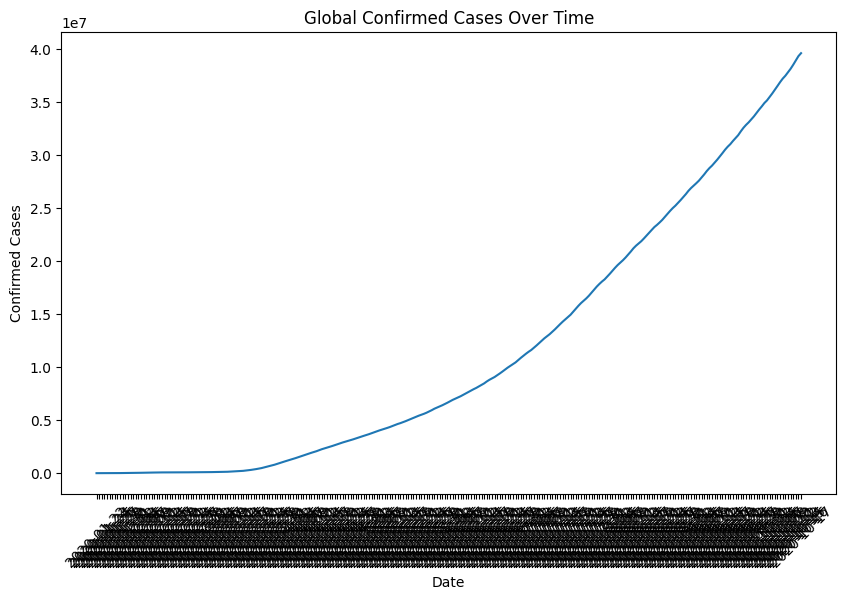

In [30]:
df_grouped = df.groupby('Date')['Confirmed'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(df_grouped['Date'], df_grouped['Confirmed'])
plt.title('Global Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()


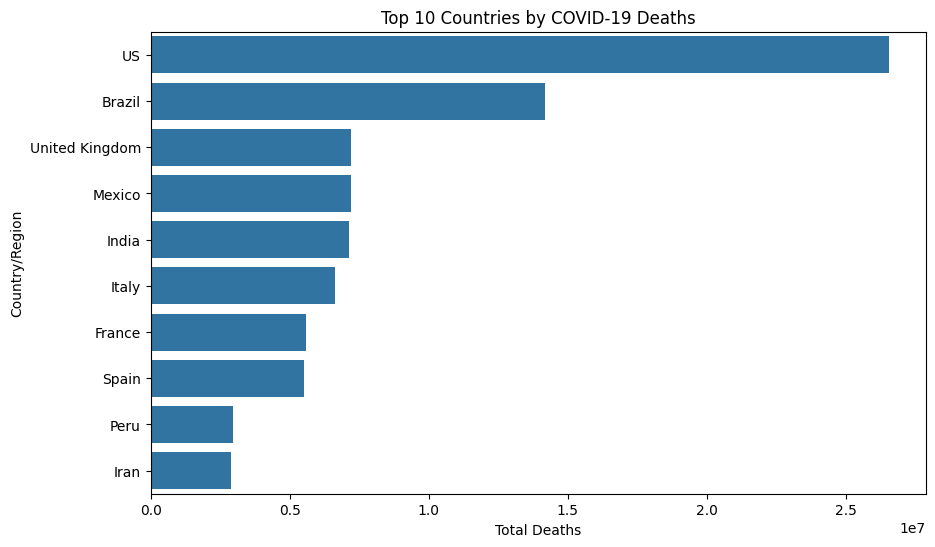

In [31]:
deaths_by_country = df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=deaths_by_country.values, y=deaths_by_country.index)
plt.title('Top 10 Countries by COVID-19 Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country/Region')
plt.show()


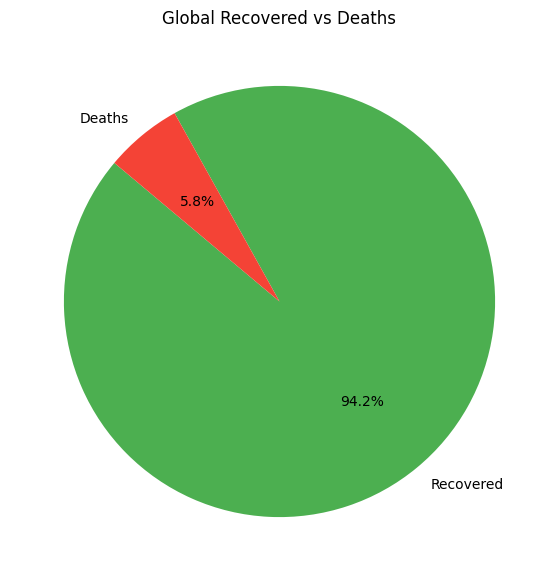

In [32]:
total_recovered = df['Recovered'].sum()
total_deaths = df['Deaths'].sum()

plt.figure(figsize=(7,7))
plt.pie([total_recovered, total_deaths],
        labels=['Recovered', 'Deaths'],
        autopct='%1.1f%%',
        startangle=140,
        colors=['#4CAF50', '#F44336'])
plt.title('Global Recovered vs Deaths')
plt.show()


 Which country had the highest deaths?
According to the dataset analysis, united states reported the highest number of deaths due to COVID-19. This country consistently showed higher death counts compared to others, highlighting the severe impact of the pandemic there.

How did cases increase over time?
From the line chart visualization, it’s clear that the number of confirmed cases steadily increased over time, with noticeable surges during certain months. The growth was gradual in the early stages but showed sharp spikes later, indicating periods of rapid virus transmission globally.
What’s the recovered-to-death ratio globally?
Based on the pie chart analysis, the global recovery rate was significantly higher than the death rate. Approximately 94.2% of the total cases resulted in recovery, while around 5.8% resulted in death. This suggests that although COVID-19 was widespread, the majority of infected individuals recovered successfully.

